# Constant Likelihood

Managing plateaus in nested sampling is tricky because the measure of enclosed prior volume is assumed to be monotonically decreasing. In this simple model, the model is simply,

$L(x) = P(y | x) = 1$

and

$P(x) = \mathcal{U}[x \mid 0, 1]$.

The analytic evidence for this model is,

$Z = P(y) = \int_\mathcal{X} L(x) p(x) \,\mathrm{d} x = 1$

## Overview

We'll cover the following topics:

1. Show how likelihood plateaus are handled in JAXNS.

In [1]:

from jaxns import NestedSampler
from jaxns import PriorChain, UniformPrior
from jaxns import summary
from jaxns import plot_cornerplot, plot_diagnostics
from jax import random, jit

In [2]:
# A PriorChain holds the definition of your prior. A number of priors are provided, and really complex ones are easy to implement.

# Simple use a PriorChain context like so to define your prior RVs.
with PriorChain() as prior_chain:
    UniformPrior('x', 0., 1.)

# The likelihood is a constant.
def log_likelihood(x):
    return 0.


true_logZ = 0.

print("True logZ={}".format(true_logZ))

WARNING[2022-04-06 18:15:24,203]: No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


True logZ=0.0


/home/albert/miniconda3/envs/jax_py/lib/python3.8/site-packages/jax/_src/numpy/lax_numpy.py:3035: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.float64'> requested in zeros is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "zeros")


In [3]:
# Create the nested sampler class. In this case without any tuning.
ns = NestedSampler(log_likelihood, prior_chain)
# We jit-compile
ns = jit(ns)
# We run, with any parameters desired. In this case, without any tuning.
results = ns(random.PRNGKey(42))


WARNING[2022-04-06 18:15:24,257]: Increasing max_samples (100000) by 100 to evenly divide samples_per_step
/home/albert/miniconda3/envs/jax_py/lib/python3.8/site-packages/jax/_src/numpy/lax_numpy.py:2983: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.float64'> requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "asarray")
/home/albert/miniconda3/envs/jax_py/lib/python3.8/site-packages/jax/_src/numpy/lax_numpy.py:2983: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.int64'> requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/j

In [4]:
# We can use the summary utility to display results
summary(results)

--------
Termination Conditions:
Small remaining evidence
--------
# likelihood evals: 3700
# samples: 1300
# likelihood evals / sample: 2.8
--------
logZ=-0.0012 +- 0.001
H=1.0
ESS=650
--------
x: mean +- std.dev. | 10%ile / 50%ile / 90%ile | MAP est. | max(L) est.
x: 0.5 +- 0.29 | 0.1 / 0.5 / 0.9 | 0.15 | 0.67
--------


'--------\nTermination Conditions:\nSmall remaining evidence\n--------\n# likelihood evals: 3700\n# samples: 1300\n# likelihood evals / sample: 2.8\n--------\nlogZ=-0.0012 +- 0.001\nH=1.0\nESS=650\n--------\nx: mean +- std.dev. | 10%ile / 50%ile / 90%ile | MAP est. | max(L) est.\nx: 0.5 +- 0.29 | 0.1 / 0.5 / 0.9 | 0.15 | 0.67\n--------'

WARNING[2022-04-06 18:15:37,194]: No handles with labels found to put in legend.
WARNING[2022-04-06 18:15:37,411]: No handles with labels found to put in legend.


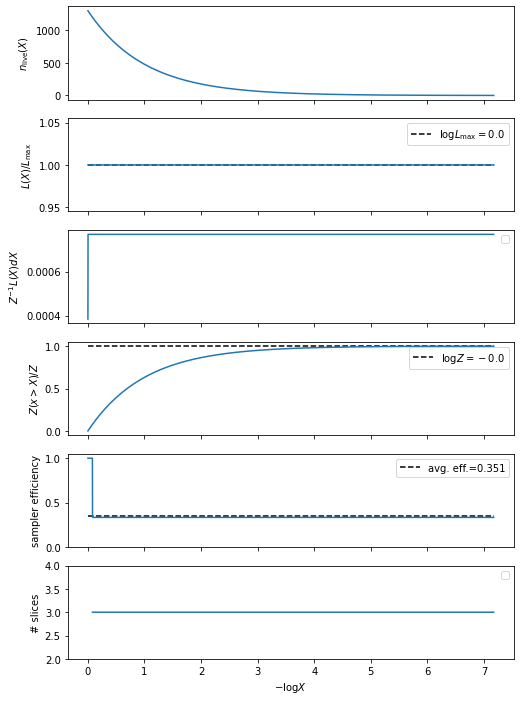

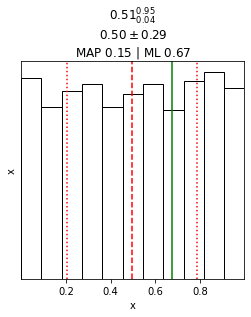

In [5]:
# We plot useful diagnostics and a distribution cornerplot.
plot_diagnostics(results)
plot_cornerplot(results)